In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup

In [2]:
options = Options()
options.add_experimental_option("detach", True)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
driver.maximize_window()
url = "https://naver.com"

driver.get(url)

# 웹 페이지 로딩하는 시간만큼 sleep을 한다.
time.sleep(3)


# 검색창에 '프로야구 순위'라는 키워드를 가상으로 검색하는 효과
# html 태그 클래스 속성이 search_input 인 곳에 '프로야구 순위'라는 키워드를 send
# driver.find_element(By.CLASS_NAME, "search_input").send_keys("프로야구 순위")
search_input = driver.find_element(By.CLASS_NAME, "search_input")
search_input.send_keys("프로야구 순위")
search_input.submit()
time.sleep(3)

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/139.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="프로야구 순위 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'프로야구 순위'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'프로야구 순위'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>프로야구 순위 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_250529.c
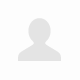
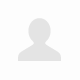

In [3]:
soup=BeautifulSoup(driver.page_source,'html.parser')
soup

In [4]:
table = soup.find('div', id="teamRankTabPanel_0").table
# print(table)
# 테이블의 각 행을 추출하여 리스트에 저장합니다.

thead = table.thead

head_list=[]
for col in thead.find_all('th'):
    head_list.append(col.text)
head_list

['순위', '팀명', '경기', '승', '무', '패', '승률', '게임차', '연속', '최근10경기']

In [5]:
tbody = table.tbody
data = []
rank = 1
# 행데이터를 처리하는 for문
for tr in tbody.find_all('tr'): # 행은 tr 태그의 반복으로 분석되어 사용
    row = []
    is_first = True
    # find_all('td) 순위를 제외한 모든 열 정보가 선택(순위는 th 태그의 값으로 정의)
    for col in tr.find_all('td'): # 열은 td 태그의 반복으로 분석되어 사용
        # 팀명이 a.text가 아니라 동일하게 td.text 인점을 기억하자 (Debug를 통해 파악)
        if is_first: # 첫번째 열 데이터를 처리하기 위한 플래그변수 활용
            row.append(rank)
            rank += 1
            is_first = False
            row.append(col.text.strip())
            continue
        row.append(col.text.strip())
    data.append(row)

data

[[1, 'LG', '125', '76', '3', '46', '0.623', '0.0', '1패', '6승-3패-1무'],
 [2, '한화', '124', '70', '3', '51', '0.579', '5.5', '3패', '5승-5패-0무'],
 [3, 'SSG', '123', '61', '4', '58', '0.513', '13.5', '1승', '5승-5패-0무'],
 [4, '롯데', '127', '62', '6', '59', '0.512', '13.5', '1승', '4승-4패-2무'],
 [5, '삼성', '125', '63', '2', '60', '0.512', '13.5', '3승', '8승-2패-0무'],
 [6, 'KT', '126', '62', '4', '60', '0.508', '14.0', '2승', '6승-4패-0무'],
 [7, 'NC', '120', '56', '6', '58', '0.491', '16.0', '1패', '5승-5패-0무'],
 [8, 'KIA', '122', '57', '4', '61', '0.483', '17.0', '2패', '3승-7패-0무'],
 [9, '두산', '125', '54', '6', '65', '0.454', '20.5', '1패', '3승-6패-1무'],
 [10, '키움', '127', '40', '4', '83', '0.325', '36.5', '1승', '3승-7패-0무']]

In [6]:
import pandas as pd
df = pd.DataFrame(data=data, columns=head_list)
df

,순위,팀명,경기,승,무,패,승률,게임차,연속,최근10경기
0,1,LG,125,76,3,46,0.623,0.0,1패,6승-3패-1무
1,2,한화,124,70,3,51,0.579,5.5,3패,5승-5패-0무
2,3,SSG,123,61,4,58,0.513,13.5,1승,5승-5패-0무
3,4,롯데,127,62,6,59,0.512,13.5,1승,4승-4패-2무
4,5,삼성,125,63,2,60,0.512,13.5,3승,8승-2패-0무
5,6,KT,126,62,4,60,0.508,14.0,2승,6승-4패-0무
6,7,NC,120,56,6,58,0.491,16.0,1패,5승-5패-0무
7,8,KIA,122,57,4,61,0.483,17.0,2패,3승-7패-0무
8,9,두산,125,54,6,65,0.454,20.5,1패,3승-6패-1무
9,10,키움,127,40,4,83,0.325,36.5,1승,3승-7패-0무


# 실습
* 네이버 검색창에 '프로축구 순위' 검색시 구단순위를 스크래핑하여 데이터 프레임으로 전환해 보세요